In [14]:
import kagglehub
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\WAJI\.cache\kagglehub\datasets\lakshmi25npathi\imdb-dataset-of-50k-movie-reviews\versions\1


In [15]:
df = pd.read_csv("IMDB Dataset.csv") #Loading my dataset
print(df.value_counts())

review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

Now, from my data, i can see there are special characters and i need to clean them by removing them
I am going to see python "re" for this. I am going to write a function for this


In [16]:
def cleaning_data(text): #Here is me defining function
    text = text.lower()  #Here is my bringing the text to lower case
    text = re.sub(r"<br /><br />", "", text) #Replacing the HTML breakpoints with ""
    text = re.sub(rf"[{string.punctuation}]", "", text)  #i also removed all punctuations too
    return text
df["review"] = df["review"].apply(cleaning_data)       #Here i applied the python built-in function with my function


In my file, there are 2 columns. There is "review" column and "sentiment" column
Since i have cleaned the review column. I need to appoint values to the categories in my "sentiment", which indicates if a statement
is positive or negative. So i am going to appoint 0 for negative and 1 for positive

In [17]:
df["sentiment"] = df["sentiment"].map({"negative" : 0, "positive" : 1})


Now i am going to divide my data into 80 percent training part and 20 percent into testing

In [18]:
#Here i divided my data into 80 and 20 percent reespecitvely
x_train, x_test, y_train, y_test = train_test_split(df["review"], df["sentiment"], test_size = 0.2, random_state = 42)

Now i am going to convert my words into vectors using CountVectorizer()


In [19]:
#Here i am using 1 and 2 n-grams
#Stopwords will remove the common English words like "the", "is" and so on
#Max_features will only keep the 100000 most important r featured vocabularies to lessen computational power

vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words = "english", max_features = 10000)
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)



Then, i am going to use Logistic Regression to train my data now

In [20]:
#I am going to create an instance of LogisticRegression and then the number if iterations to be 1000, i.e the model can calculate its errors 1000 times
model = LogisticRegression(max_iter = 1000)
model.fit(x_train_vec, y_train)


LogisticRegression(max_iter=1000)

Then i will evaluate and predict my Model here


In [21]:
y_pred = model.predict(x_test_vec)
print("This is my Classification Report")
print(classification_report(y_test,y_pred))

      

This is my Classification Report
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4961
           1       0.87      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



From the classification report, the model got correctly got 87% of TP for both Negative and Positive texts, which means 13% of its responses were TN
.The model also accounted to correctly predict 87% of all the Actual TP in the whole data. Well, this is a good result

In [ ]:
Now i am going to plot my confusion Matrix 

This is my Confusion Matrix


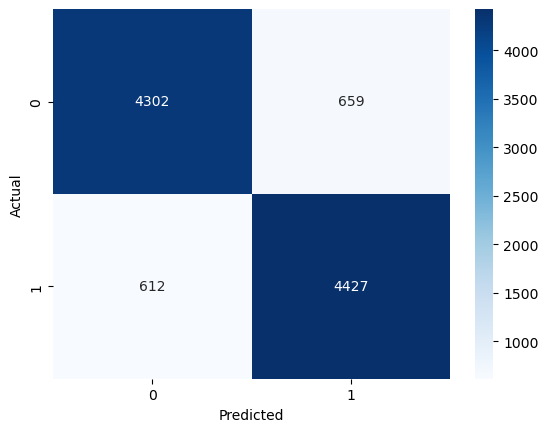

In [22]:
print("This is my Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

My model's performance is not reallt bad, it missed Negative values to be positive just 659 times and then mistaked Positive to be negative 612 times

In [23]:
def predict_sentiment(text):
    text = cleaning_data(text)
    vec = vectorizer.transform([text])
    pred = model.predict(vec)
    return 'positive' if pred[0] == 1 else 'negative'

predict_sentiment("This is the worst class i have ever been to")


'negative'



Now i am going to use TfidVectorizer to compare results since it reduces the weigth of common words


In [27]:


tfidf = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_features=10000)
X_train_tfidf = tfidf.fit_transform(x_train)
X_test_tfidf = tfidf.transform(x_test)

# Train the same model again with TF-IDF features
model= LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Evaluate
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Now i think my TfidVectorizer works better with Logistic Regression, just a slight difference though. Negative value has total 90% of TP
Then 88% of Positive Values of all the actual prediction it made. Of all the total predictions in the dataset, Negative values were predicted 87% and 91%. This
is actually bettter than CountVectorizer, then an accuracy prediction of 89%.

In [35]:
def predict_sentiment(text):
    text = cleaning_data(text)
    vec = tfidf.transform([text])
    pred = model.predict(vec)
    return 'positive' if pred[0] == 1 else 'negative'

predict_sentiment(" bad ")


'negative'

This is my Confusion Matrix


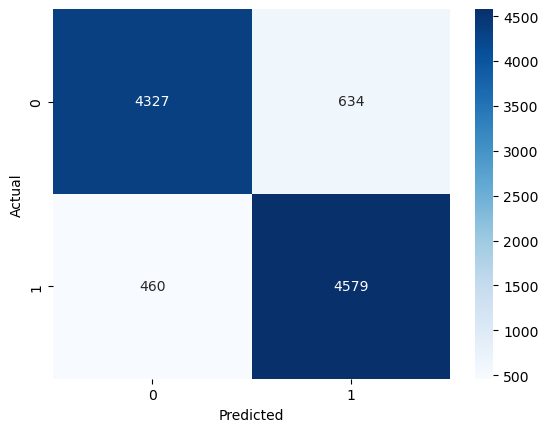

In [36]:
print("This is my Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()